######## DATA LOAD
Data loaded
######## GENERAL INFORMATION
######## Total: 
Amount of reviews:  72424
######## COMPLETION CHECK
Missing Text
Missing/Empty review text: 0
Missing review text as percentage: 0.00% 
Missing Label
Missing rating information 0
Missing rating information as percentage: 0.00%
Before deleting empty review texts:  72424
After deleting empty review texts:  72424
######## DUPLICATION CHECK
Before deleting duplicate entries:  72424
After deleting duplicate entries:  72424
Before deleting duplicate review texts:  72424
After deleting duplicate review texts:  72424
######## WORD COUNT
The longest review text in our sample has 7744 words.
Longest review text:

264667    For The Adventures of Robin Hood, Warner Bros....
Name: text, dtype: object 264667    5
Name: label, dtype: int64
The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 7 times.
117009              "Scary"@en
219792                \nUgh.\n
221495  

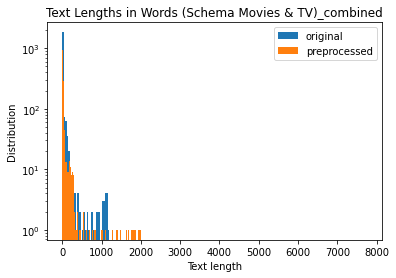

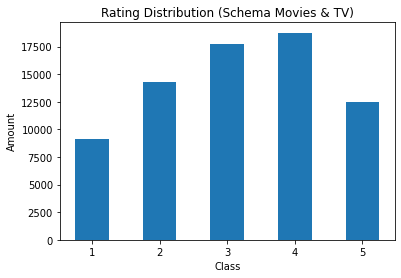

In [1]:
from Scripts import profiling as pf, preprocessing as prep, cleaning as cl
import pandas as pd

print('######## DATA LOAD')
schema_link = '../Data/schema_movie.pkl'
df = pd.read_pickle(schema_link)
print('Data loaded')

print('######## GENERAL INFORMATION')
pf.get_review_count(df)

print('######## COMPLETION CHECK')
print('Missing Text')
pf.get_missing_text(df)
print('Missing Label')
pf.get_missing_label(df)
print('Before deleting empty review texts: ', len(df))
df = df[df['text'] != '']
print('After deleting empty review texts: ', len(df))


print('######## DUPLICATION CHECK')
df = cl.remove_duplicates(df)
df = cl.remove_dup_text(df)


print('######## WORD COUNT')
df = pf.create_word_count(df)
pf.get_longest_review(df)
pf.get_shortest_review(df)

print('# Less than 10 words: ')
print(df[df.word_count<10]['label'].value_counts())
print('More than 1000 words: ')
print(df[df.word_count>1000]['label'].value_counts())

pf.show_word_length_dist(df, 'schema_movie_textlength_raw_logarithmic', 'Schema Movies & TV', True)


print('######## RATING DISTRIBUTION')
pf.show_rating_dist(df, 'schema_movie_class_dist_raw', 'Schema Movies & TV')

######## Most Frequent Words
######## Most Frequent Word Stems
         Word  Frequency
0           n     275004
1           u     212128
2         not     144485
3         but     115686
4        movi     101576
5        film      99459
6         one      68527
7        like      59345
8   googletag      41066
9     charact      40180
10       make      38763
11      stori      38292
12       time      37918
13      would      35227
14        get      32185
15         no      31001
16       even      30440
17       good      28935
18       play      28813
19        see      27293
20      scene      27291
21        way      27252
22       love      25626
23       much      25498
24       look      24996
25      watch      24789
26       also      23491
27       work      23326
28      first      22873
29         ad      22844
30       seem      22595
31       life      22445
32       push      22402
33       well      22344
34    display      22042
35        end      21958
36        tw

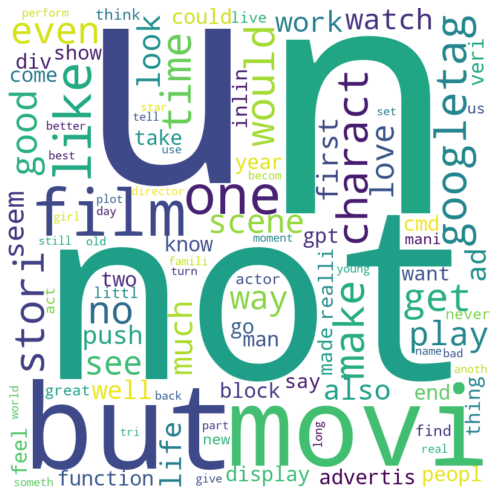

,Word,Frequency
0,n,275004
1,u,212128
2,not,144485
3,but,115686
4,movi,101576
...,...,...
95,young,11993
96,long,11954
97,girl,11885
98,tell,11803


<Figure size 432x288 with 0 Axes>

In [2]:
print('######## Most Frequent Words')
pf.get_mostcommon(df, 'test_most_common_phone')

In [2]:
print('######## DATA SOURCES')
df = pf.get_source_info(df)
print('#### All sources across ratings')
print('#### rating class 1.0')
print(df[df.label==1.0]['netloc'].value_counts())
print('#### rating class 2.0')
print(df[df.label==2.0]['netloc'].value_counts())
print('#### rating class 3.0')
print(df[df.label==3.0]['netloc'].value_counts())
print('#### rating class 4.0')
print(df[df.label==4.0]['netloc'].value_counts())
print('#### rating class 5.0')
print(df[df.label==5.0]['netloc'].value_counts())

######## DATA SOURCES
Total netloc distribution
www.imdb.com               27154
reviewschview.com          16210
www.rogerebert.com          9713
www.empireonline.com        8444
thereviewmonk.com           5529
deepfocusreview.com         2090
www.telegraph.co.uk         1150
www.rollingstone.com         955
www.flickfilosopher.com      951
www.noopler.com              204
nationalpost.com              24
Name: netloc, dtype: int64
extracted netloc distribution
www.rogerebert.com         9713
reviewschview.com          3276
thereviewmonk.com          1407
deepfocusreview.com        1132
www.flickfilosopher.com     766
www.telegraph.co.uk         215
www.noopler.com             204
nationalpost.com             24
Name: netloc, dtype: int64
scraped netloc distribution
www.imdb.com               27154
reviewschview.com          12934
www.empireonline.com        8444
thereviewmonk.com           4122
deepfocusreview.com          958
www.rollingstone.com         955
www.telegraph.co.uk    

In [3]:
print(max(df.word_count))
print(max(df.prep_word_count))


7744
4979


In [ ]:
# WORD COUNT DISTRIBUTION THROUGHOUT RATINGS
pf.show_word_length_per_label(df)

In [2]:
df['word_count'].value_counts().sort_index()

1         7
2        80
3       182
4       248
5       346
       ... 
6069      1
6226      1
6536      1
6968      1
7744      1
Name: word_count, Length: 2081, dtype: int64

In [2]:
pd.options.display.max_rows=300
df['prep_word_count'].value_counts().sort_index()

1         21
2        282
3        548
4        813
5       1121
        ... 
3876       1
3934       1
4066       1
4516       1
4979       1
Name: prep_word_count, Length: 1378, dtype: int64

In [3]:
print('######## DATA SOURCES')
df = pf.get_source_info(df)


######## DATA SOURCES
Total netloc distribution
www.imdb.com               27154
reviewschview.com          16210
www.rogerebert.com          9713
www.empireonline.com        8444
thereviewmonk.com           5529
deepfocusreview.com         2090
www.telegraph.co.uk         1150
www.rollingstone.com         955
www.flickfilosopher.com      951
www.noopler.com              204
nationalpost.com              24
Name: netloc, dtype: int64
extracted netloc distribution
www.rogerebert.com         9713
reviewschview.com          3276
thereviewmonk.com          1407
deepfocusreview.com        1132
www.flickfilosopher.com     766
www.telegraph.co.uk         215
www.noopler.com             204
nationalpost.com             24
Name: netloc, dtype: int64
scraped netloc distribution
www.imdb.com               27154
reviewschview.com          12934
www.empireonline.com        8444
thereviewmonk.com           4122
deepfocusreview.com          958
www.rollingstone.com         955
www.telegraph.co.uk    